In [1]:
AGENT_NAME = 'default_PPO_citylearn_challenge_2022_phase_2_Building_6_20_bins_500'
DATASET_NAME = 'citylearn_challenge_2022_phase_2' #only action is electrical storage

In [2]:
from stable_baselines3 import PPO

from citylearn.data import DataSet

import pandas as pd
import numpy as np

import KBMproject.utilities as utils

%matplotlib inline

In [3]:
schema = DataSet.get_schema(DATASET_NAME)

Define RL agent

In [4]:
agent = PPO.load(path=f"{AGENT_NAME}")
print('Model loaded from storage')

Model loaded from storage


In [5]:
bins = agent.action_space[0].n
env = utils.make_discrete_env(schema=schema,  
                        action_bins=bins,
                        seed=42)

In [6]:
baseline_kpis, baseline_obs, baseline_a = utils.eval_agent(env,agent)
display(baseline_kpis)

cost_function
annual_peak_average                      1.102271
carbon_emissions_total                   0.869186
cost_total                               0.787803
daily_one_minus_load_factor_average      1.095762
daily_peak_average                       0.894595
electricity_consumption_total            0.879108
monthly_one_minus_load_factor_average    0.988364
ramping_average                          1.093749
zero_net_energy                          1.107710
Name: District, dtype: float64

In [7]:
baseline_a.shape

(8759, 1)

In [8]:
baseline_obs.shape

(8759, 31)

In [11]:
attr_fp = utils.get_feature_permutations(agent, baseline_obs, baseline_a)
attr_fp = pd.Series(attr_fp, index=env.observation_names[0])
display(attr_fp.sort_values(ascending=False))

hour_cos                                      2.183646
electrical_storage_soc                        2.132054
day_type_sin                                  1.238101
month_cos                                     1.214560
non_shiftable_load                            1.147354
day_type_cos                                  1.059427
hour_sin                                      1.028390
diffuse_solar_irradiance_predicted_24h        0.924671
diffuse_solar_irradiance                      0.885193
direct_solar_irradiance_predicted_12h         0.847786
direct_solar_irradiance_predicted_24h         0.755595
direct_solar_irradiance                       0.665964
electricity_pricing_predicted_12h             0.654663
direct_solar_irradiance_predicted_6h          0.550717
diffuse_solar_irradiance_predicted_12h        0.500220
electricity_pricing                           0.476659
month_sin                                     0.455695
electricity_pricing_predicted_6h              0.453258
electricit

In [10]:
attr_ig = utils.get_integrated_gradradients(agent, baseline_obs, baseline_a)
attr_ig = pd.Series(attr_ig, index=env.observation_names[0])
display(attr_ig.sort_values(ascending=False))

electrical_storage_soc                        3.935257
diffuse_solar_irradiance_predicted_24h        2.258764
diffuse_solar_irradiance                      1.910981
hour_cos                                      1.791611
direct_solar_irradiance_predicted_12h         1.169213
carbon_intensity                              0.849705
hour_sin                                      0.819982
day_type_cos                                  0.666830
month_cos                                     0.626967
direct_solar_irradiance_predicted_24h         0.556941
electricity_pricing                           0.454744
direct_solar_irradiance_predicted_6h          0.370647
diffuse_solar_irradiance_predicted_12h        0.257724
electricity_pricing_predicted_24h             0.184290
outdoor_relative_humidity_predicted_6h        0.169630
month_sin                                     0.146687
outdoor_relative_humidity                     0.146074
solar_generation                              0.004846
outdoor_dr

In [ ]:
def min_max_norm()

# TODO 
implement min max scalar for a single array to apply to each column

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_attr = pd.DataFrame([scaler.fit_transform(attr_ig.values),scaler.fit_transform(attr_ig.values)], index=env.observation_names[0],columns=['ig','fp'])
df_attr.plot.barh(figsize=(20,12))

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.62696748  0.14668716  0.66682981 -0.03557746  1.79161132  0.8199817
 -0.00708268 -0.49022098 -0.45956392 -0.16472797  0.14607372  0.16963028
 -0.40372627 -0.2166381   1.91098066 -0.17482013  0.2577235   2.25876425
 -0.52022944  0.37064709  1.1692126   0.55694055  0.84970476 -1.24389562
  0.00484564  3.93525665 -0.86771634  0.4547436  -0.17055001 -0.09973214
  0.18428986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Axes: >

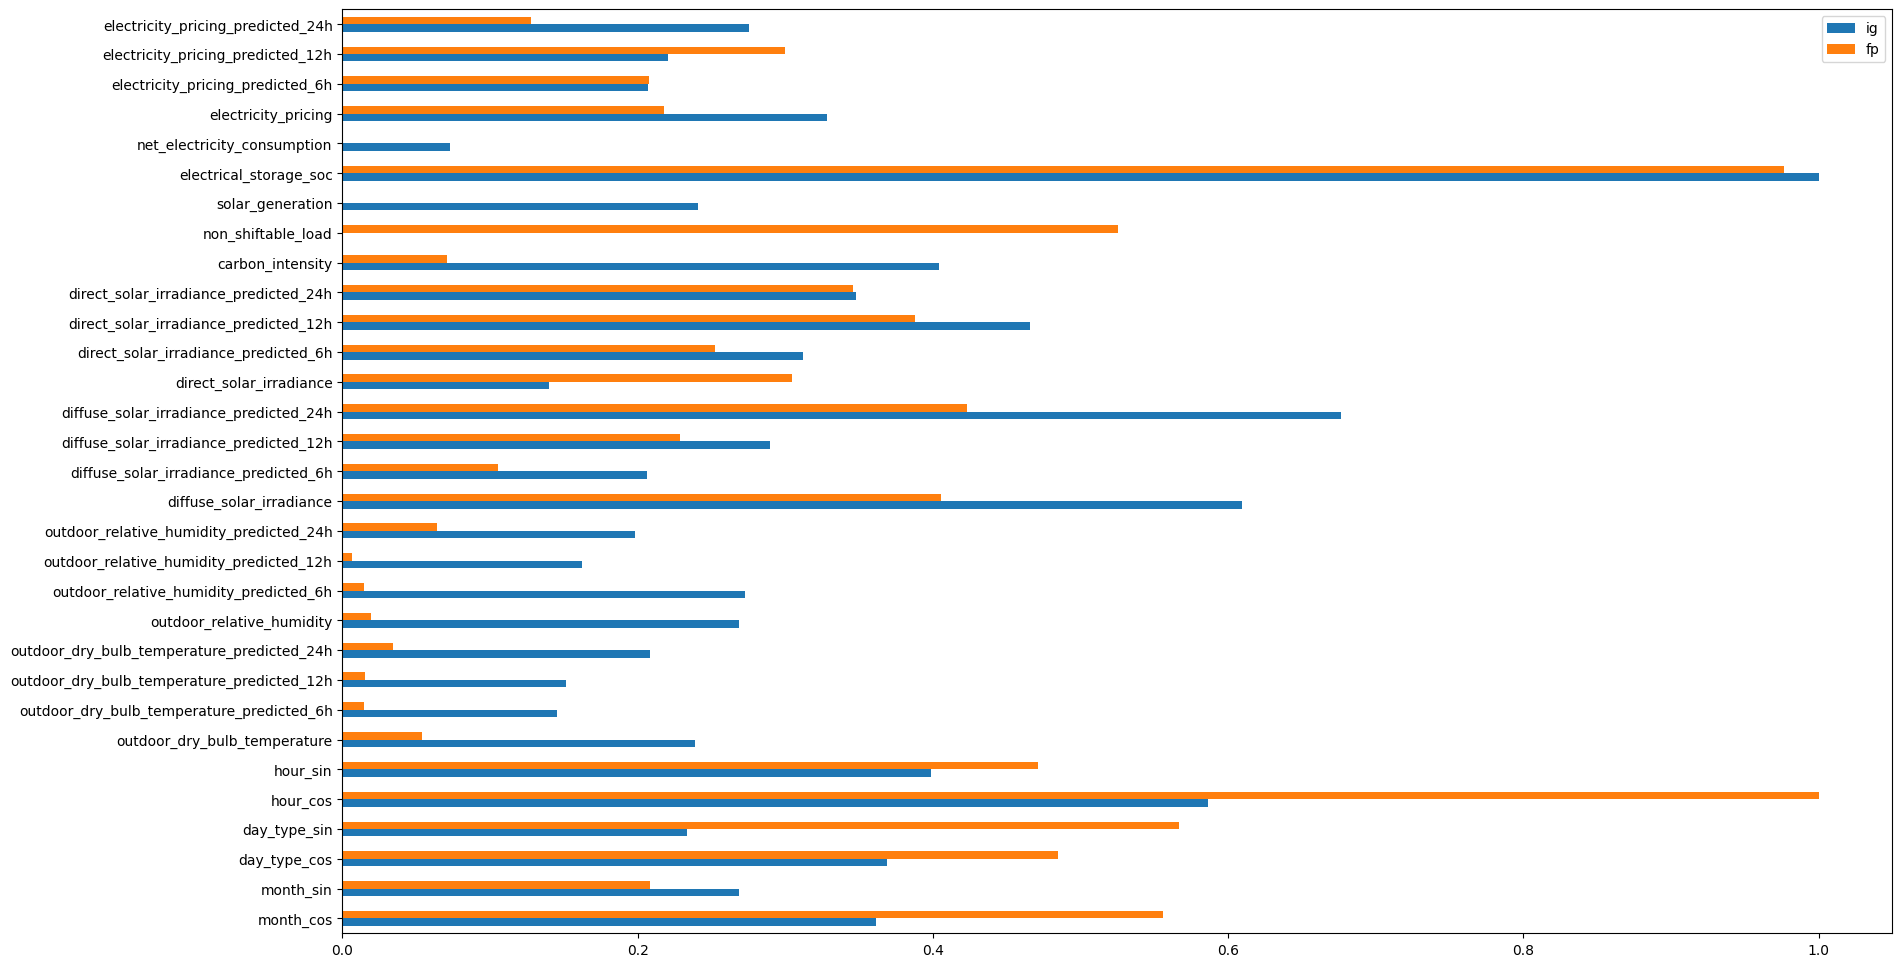

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_attr = pd.concat([attr_ig, attr_fp], axis='columns')
df_attr.columns = ['ig','fp']
df_attr = pd.DataFrame(scaler.fit_transform(df_attr), columns=df_attr.columns, index=df_attr.index) # I don't think the scaling is columnwise, since no ig value is near 0
df_attr.plot.barh(figsize=(20,12))